In [35]:
#importing libary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


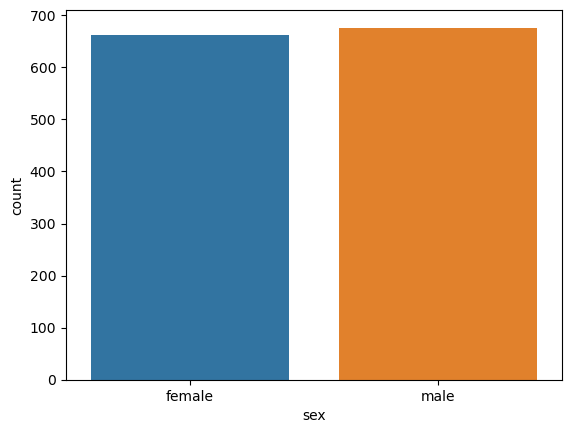

In [12]:
# let's analysis(univariate,bivariate and multivariated)

sns.countplot(x='sex', data=df)
plt.show()

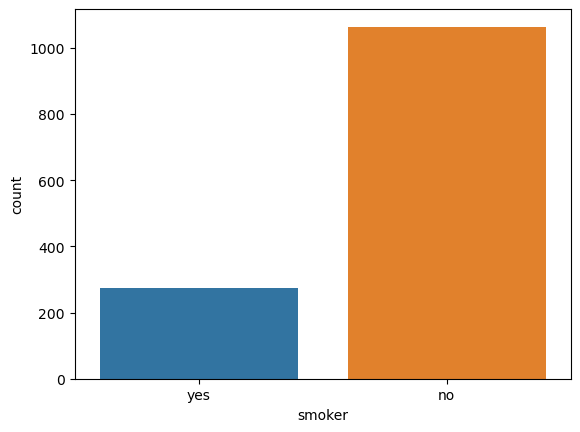

In [13]:
sns.countplot(x='smoker', data=df)
plt.show()

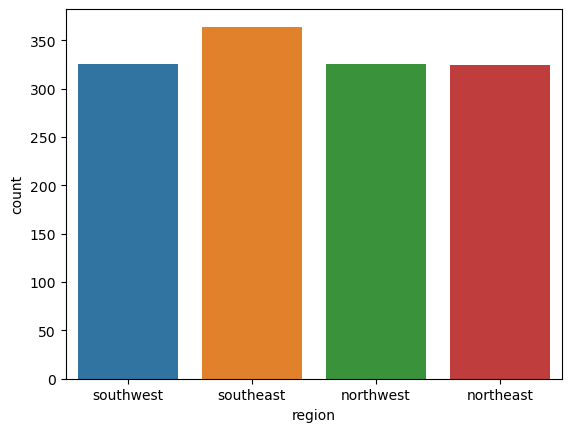

In [14]:
sns.countplot(x='region', data=df)
plt.show()

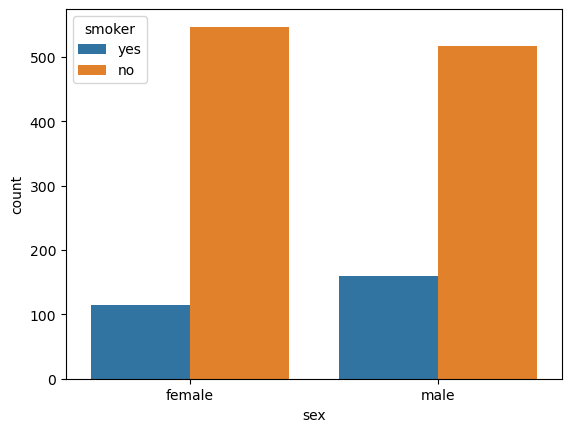

In [15]:
sns.countplot(x='sex',hue='smoker', data=df)
plt.show()

In [16]:
# Encode the categorical features

sex_wrap = {'male':0, 'female':1}
df.sex = df.sex.replace(sex_wrap)


In [17]:
df.smoker.value_counts()
smoker_wrap = {'no':0, 'yes':1}
df.smoker = df.smoker.replace(smoker_wrap)

In [18]:
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [19]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


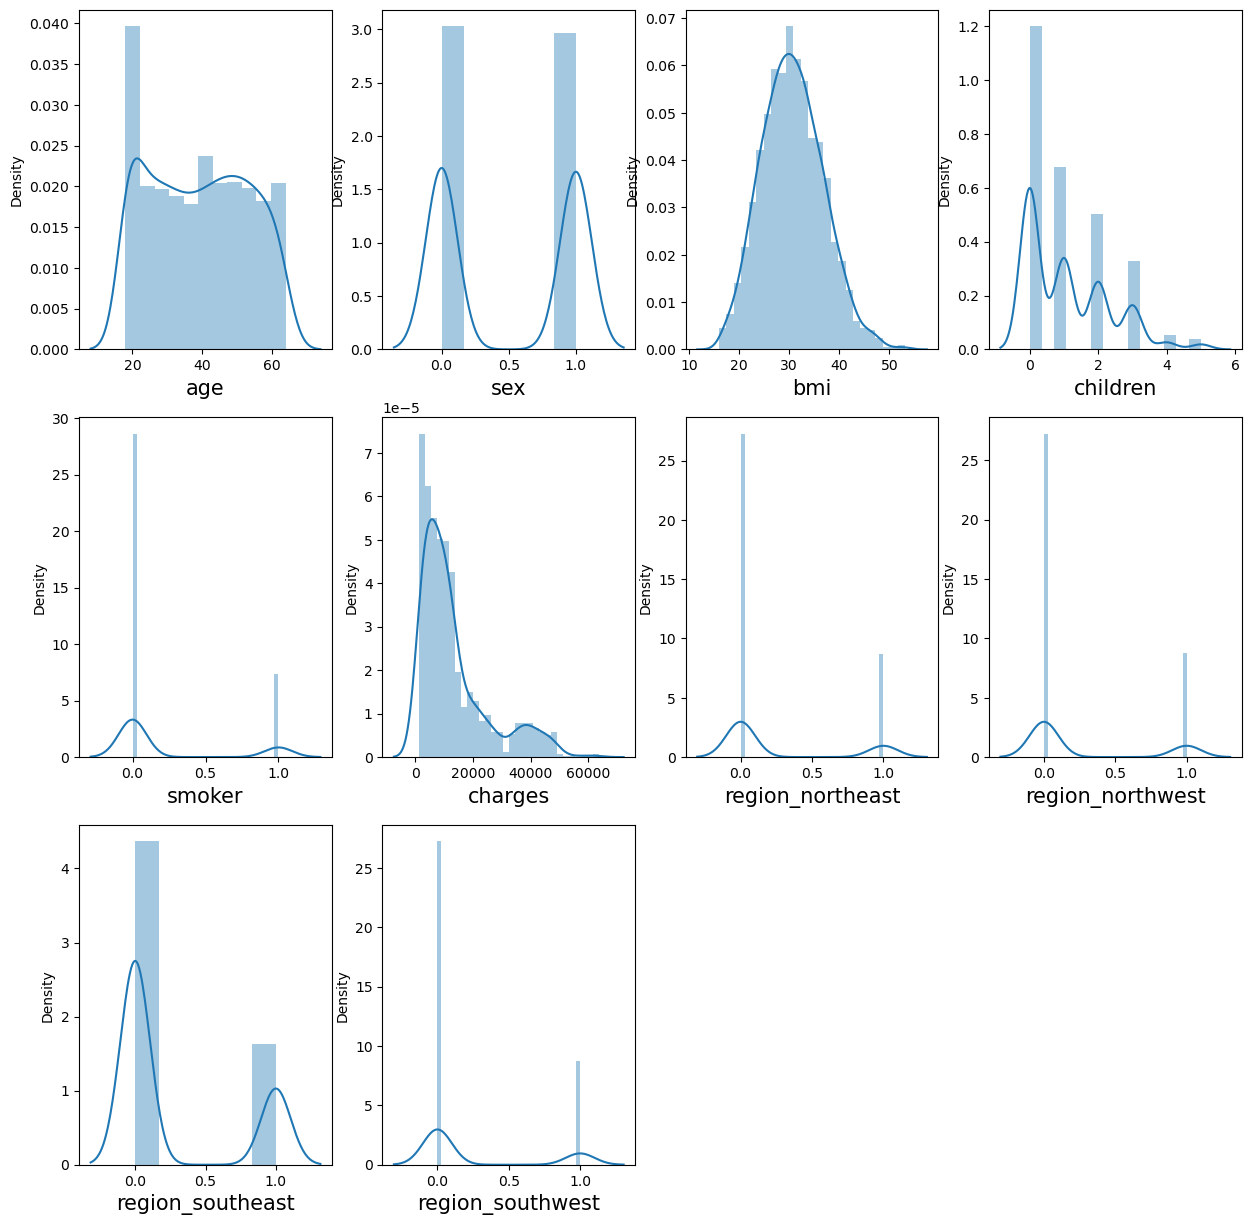

In [20]:
#chechking the data is normal distributed or not

plt.figure(figsize=(15,15))
plotnumber =1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

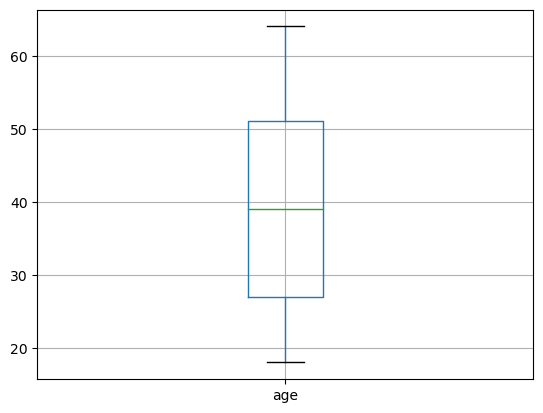

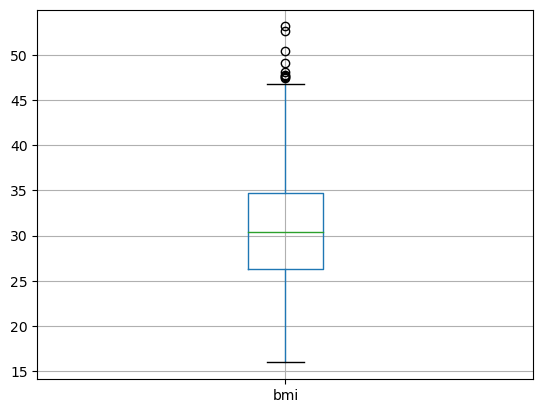

In [23]:
numerical_columns = ['age', 'bmi']
for column in numerical_columns:
    df.boxplot(column)
    plt.show()

In [26]:
# Handling outliers from bmi column

Q1= np.percentile(df['bmi'],25)
Q3= np.percentile(df['bmi'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df=df[(df['bmi']>outlier_down) & (df['bmi']<outlier_up)]

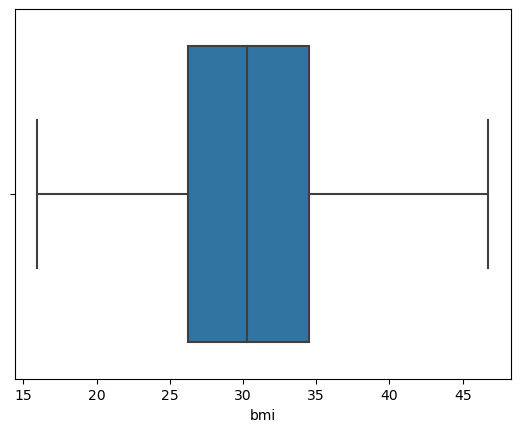

In [27]:
sns.boxplot(x='bmi', data=df)
plt.show()

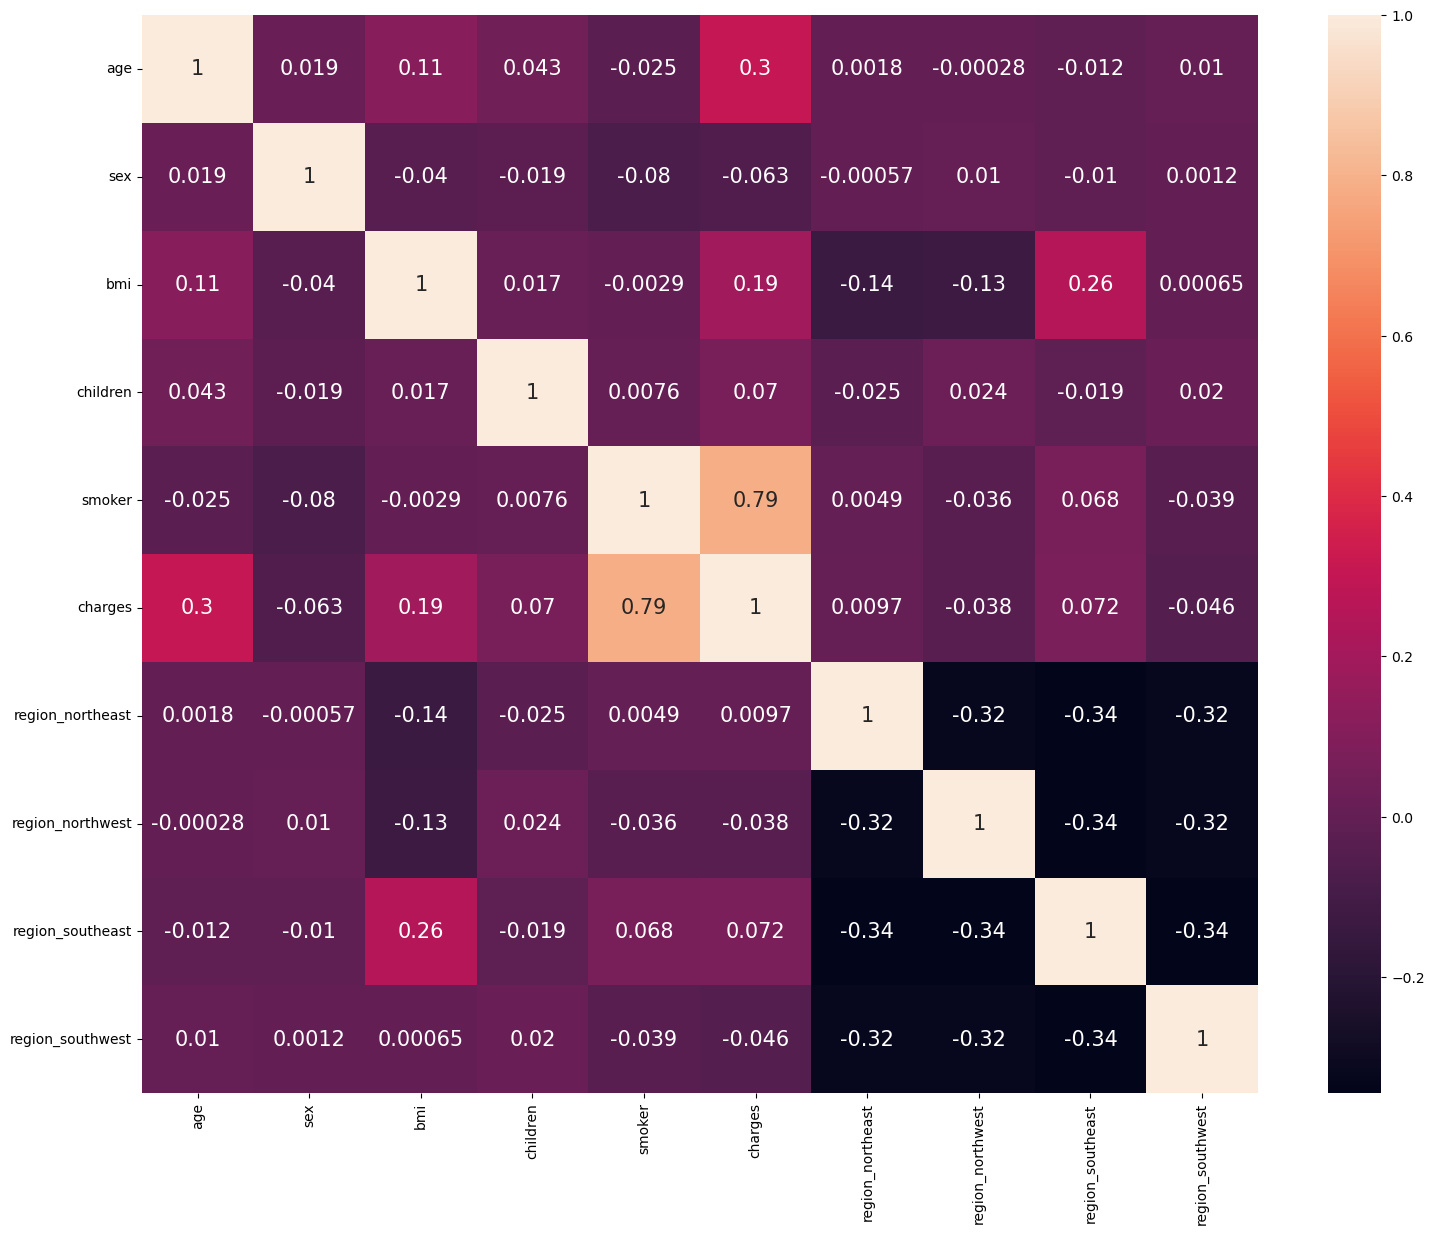

In [28]:
# plotting Heatmap correlation

df_cor= df.corr() # checking relationship

plt.figure(figsize=(18,14))
sns.heatmap(df_cor, annot=True, annot_kws={'size':15})
plt.show()

In [29]:
X = df.drop("charges", axis=1)
y = df.charges

In [30]:
# applying standard scaler

scalar= StandardScaler()
X_scaler= scalar.fit_transform(X)

In [31]:
# train test split

x_train,x_test,y_train,y_test= train_test_split(X_scaler, y, test_size=0.25, random_state=42)

In [34]:
#Linear Regression

LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [37]:
import math
def get_metrics(preds, actual, model_type):
    r2s = r2(preds, actual)
    maes = mae(preds, actual)
    mses = mse(preds, actual)
    rmses = math.sqrt(mses)
#return rmse, mse, mae, r2
    df = pd.DataFrame([r2s, maes, mses, rmses, model_type]).transpose()
    df.columns = ['r2 coeff.', 'MAE', 'MSE', 'RMSE', 'Type of model']
    return df
df_metrics = get_metrics(y_pred, y_test, 'Linear Regression')
df_metrics

,r2 coeff.,MAE,MSE,RMSE,Type of model
0,0.704997,3906.233777,30854304.517632,5554.665113,Linear Regression


In [38]:
import pickle
pickle.dump(LR, open('medical_insurance_model.pkl', 'wb'))

In [39]:
pickled_model = pickle.load(open('medical_insurance_model.pkl', 'rb'))
pickled_model.predict(x_test)

array([  534.17595736, 13110.17595736,  1334.17595736,  8086.17595736,
        4534.17595736,  8790.17595736,  5590.17595736,  1654.17595736,
       39926.17595736, 14070.17595736, 37686.17595736, 28470.17595736,
        7382.17595736, 32278.17595736,  5046.17595736,  8950.17595736,
       10582.17595736,  8086.17595736,  8758.17595736, 27862.17595736,
         406.17595736, 10614.17595736,  6902.17595736,  3062.17595736,
       10038.17595736, 34070.17595736, 10134.17595736,  7798.17595736,
       10070.17595736,  6006.17595736,  2550.17595736,  7126.17595736,
        2550.17595736, 11478.17595736,  7062.17595736,  6838.17595736,
        8022.17595736, 30390.17595736,   726.17595736, 36726.17595736,
       30390.17595736,  -585.82404264,  7542.17595736,  5910.17595736,
       10966.17595736,  9526.17595736,  4982.17595736,  4214.17595736,
       13590.17595736,  4822.17595736,    86.17595736, 34998.17595736,
       15286.17595736, 13014.17595736,  4630.17595736, -1225.82404264,
      